In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import linear_model
 

['setosa' 'versicolor' 'virginica']


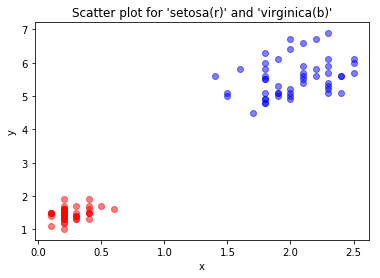

In [27]:
iris = load_iris()

# print(iris.data)
# print(iris.feature_names)

# print(iris.target)
print(iris.target_names)

# print(type(iris.data))
# print(type(iris.target))
# ['setosa' 'versicolor' 'virginica']

df1 = pd.DataFrame(iris.data,columns=['sl','sw','pl','pw'])

df2 = pd.DataFrame(iris.target,columns=['ty'])

df = pd.concat([df1, df2], axis=1)

x = [i for i in range(len(df[df.ty == 1]))]
y = df[df.ty == 0]['pw']  #'setosa'
z = df[df.ty == 0]['pl']  #'setosa'
 
plt.scatter(y, z,c='r', alpha=0.5)

y = df[df.ty == 2]['pw']  #'virginica'
z = df[df.ty == 2]['pl']  #'virginica'

plt.scatter(y, z,c='b', alpha=0.5)

plt.title('Scatter plot for \'setosa(r)\' and \'virginica(b)\'')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


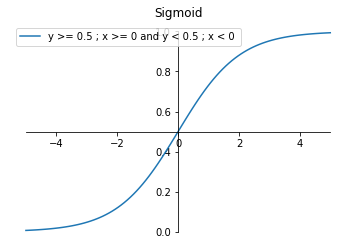

In [28]:
def sig(v):
    return 1 / (1 + np.exp(-v))

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

x = np.linspace(-5,5,100,0.5)
s = sig(x)

ax.set_title('Sigmoid')
ax.plot(x, s)
ax.legend(['y >= 0.5 ; x >= 0 and y < 0.5 ; x < 0 ']) 

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 
plt.show()

A linear equation can be given by 
\begin{align}
f(x) & = \theta_0 + \theta_1x_1 + \theta_2x_2 ... + \theta_nx_n
\end{align}

When we require the outout of f(x) to be between 0 to 1, we can combine it with sigmoid h(z)

\begin{equation*}
h(z)  = \frac{1}{(1+e^{-z})}
\end{equation*}

The matrix represntation of combined equation would be

\begin{equation*}
h(f(x))  = h_\theta(x) = \frac{1}{(1+e^{-\theta^TX})}
\end{equation*}

The cost function of the function $f_\theta(x) = \theta^TX$, is given by

\begin{equation*}
cost(f_\theta(x),y) = \frac{1}{2n} ( \sum_{i=1}^n  \left( f_\theta(x_i) - y_i  \right)^2  )
\end{equation*}

Combining the cost function of the Linear equation with Sigmoid would be 

\begin{equation*}
cost(h_\theta(x),y) = \frac{1}{2n} ( \sum_{i=1}^n  \left( h(f(x)) - y_i  \right)^2  )
\end{equation*}

This cost can be simplified in the form of 
$
J(\theta)=-\frac{1}{n}\sum_{i=1}^{n}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))
$ and the partial derivative can be given by

\begin{equation*}
\frac{\partial }{\partial \theta_j} J(\theta) =\frac{1}{m}\sum\limits_{i=1}^{m}{(P(y_i|x_i,\theta)-y_i).x_i^j}
\end{equation*}



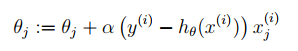

In [153]:
class BinClassification:
    
    theta = np.atleast_2d([ np.random.uniform(-1, 1, 4) ]).T  # initialize
            #np.asarray([[ 0.33451582], [-0.58057756],[ 0.07062406] ,[-0.24721348]])
            
    alpha = 0.0001 # learning rate
    regularization = 0
    
    def sigmoid(self,z):
        return 1. / (1 + np.exp(-z))
    
    def z(self,theta, x):
        assert theta.shape[1] == 1
        assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
        return np.dot(x, theta)
    
    def hypothesis(self,theta, x):
        return self.sigmoid(self.z(theta, x))

    def cost(self,theta, x, y):
        assert x.shape[1] == theta.shape[0]  # x has a column for each feature, theta has a row for each feature.
        assert x.shape[0] == y.shape[0]  # One row per sample.
        assert y.shape[1] == 1
        assert theta.shape[1] == 1
        h = self.hypothesis(theta, x)
        one_case = np.matmul(-y.T, np.log(h))
        zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
        return (one_case + zero_case) / len(x)

    def gradient_descent(self,theta, x, y, learning_rate, regularization = 0):
        regularization = theta * regularization
        error = self.hypothesis(theta, x) - y
        n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
        return theta - n

    def fit(self,x_train,y_train):
        costs = []
        for _ in range(1000):
            self.theta = self.gradient_descent(self.theta, x_train, y_train, self.alpha, self.regularization)
            costs.append(self.cost(self.theta, x_train, y_train)[0][0])
            
        
    def predict(self,x_test):
        return self.hypothesis(self.theta, x_test)
         

In [164]:
class BinClassification:
    
    theta = [1,1,1,1]#np.array([ 0.33451582,-0.58057756, 0.07062406,-0.24721348]) # initialize
    alpha = 0.01 # learning rate
    
    
    def fit(self,x_train,y_train):
        
        y_train = y_train.reshape(150,1)
        for i in range(1000):
            hypothesis = (1 / (1 + np.exp(-np.dot(x_train, self.theta))))
            loss = -np.mean(y_train*np.log(hypothesis) + (1-y_train)*np.log(1-hypothesis))
            gradient = np.sum(np.dot((hypothesis - y_train), x_train),axis=0)/x_train.shape[0]
            self.theta = self.theta - self.alpha * gradient
            
#             print("Iteration %d | Cost: %f" % (i, loss),end=", ")
#             print(self.theta)
        return
    
    def predict(self,x_test):
        
        return (1 / (1 + np.exp(-np.dot(x_test, self.theta))))


In [165]:
x_train = np.asarray(df[['sl'  , 'sw'  , 'pl' ,  'pw']])
y_train = np.asarray(df[['ty']])

x_test = np.asarray([ [5.1, 3.5, 1.4, 0.2],
           [4.9, 3.0, 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           [4.6, 3.1, 1.5, 0.2],
           [6.3, 2.5, 5.0, 1.9],
           [6.5, 3.0, 5.2, 2.0],
           [6.2, 3.4, 5.4, 2.3],
           [5.9, 3.0, 5.1, 1.8]
        ])

# logreg = linear_model.LogisticRegression(C=1e5)
# logreg.fit(x_train,y_train)
# logreg.predict(x_test)
 
binclass = BinClassification()
binclass.fit(x_train,y_train)
binclass.predict(x_test)

array([0.99998198, 0.9999619 , 0.99995751, 0.9999571 , 0.99999994,
       0.99999998, 0.99999999, 0.99999994])